# Intro to Numerical Computing

This lecture focuses on numerical methods for solving typical problems in Physics and Astrophysics. To start, we will look at how to use some Python libraries that will make this process easier. The most essential of these are Numpy and Matplotlib. Numpy introduces arrays, and Matplotlib allows us to visualize data.

## Numpy

Numpy arrays behave similarly to Python lists, but have some important differences:

1. Arrays are fixed size, i.e. you cannot append or delete elements (without creating a new array and deleting the old one).
2. Because of their definite size, and because of optimized C/Fortran code, arrays are faster for most operations.
3. Arrays simplify indexing in more than one dimension.
4. Arrays have a much larger set of mathematical operations, behaving similarly to vectors and matrices (but with some important differences).

Lets explore how to make and manipulate numpy arrays

In [1]:
# import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# A really simple array
array = np.zeros(3)
print(array)

[0. 0. 0.]


In [3]:
# A really simple 2D array
array_2d = np.ones((3, 3))
print(array_2d)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [5]:
# The 3D Identity Matrix
I = np.eye(3)
print(I)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [6]:
# Some arrays with various values
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 6, 7])

# Addition
print("Addition:", arr1 + arr2)

# Dot product
print("Dot product:", arr1.dot(arr2))
print("Dot Product:", arr1 @ arr2)

# Outer product
print("Outer Product:\n", np.outer(arr1, arr2))

# Transpose
print("Transpose of Outer Product:\n", np.outer(arr1, arr2).T)

Addition: [ 5  8 10]
Dot product: 37
Dot Product: 37
Outer Product:
 [[ 4  6  7]
 [ 8 12 14]
 [12 18 21]]
Transpose of Outer Product:
 [[ 4  8 12]
 [ 6 12 18]
 [ 7 14 21]]


The library numpy.linalg (see also scipy.linalg) provides access to a wide range of linear algebra routines. For example, we can invert a matrix:

In [15]:
# create a random 3x3 matrix:
A = np.random.rand(3,3)
print(A)

# compute its inverse:
A_inv = np.linalg.inv(A)
print(A_inv)

# check that A_inv.A gives the identity (to machine precision):
print(np.round(A_inv @ A,decimals=14))

[[0.62973395 0.49925982 0.96805801]
 [0.59203715 0.28635651 0.69756526]
 [0.41146392 0.81653137 0.00182392]]
[[-4.1142054   5.70821501  0.51372541]
 [ 2.06731334 -2.87147929  0.96767906]
 [ 2.64315601 -2.23234821 -0.83324924]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Exercise

Solve the system of equations $\mathcal{A} \vec x = \vec b$ using numpy where $\mathcal{A}$ and $\vec b$ are defined below.

In [59]:
A = np.array(
    [[0, 0, 1],
     [1, 1, 1],
     [4, 2, 1]]
)

b = np.array([6, 0, 0])

## Speeding Up Calculation with Numpy

Numpy is also useful because it can often speed up calculations which are otherwise slow in Python. In languages such as C, the compiler can often perform what is called vectorization, which is when a for loop where the $i+1-$th step does not depend on the $i-$th step can be "unrolled" and the processor can do more than one of the iterations at a time. However, since Python is interpreted it does not have the prior knowledge needed to do this, so for loops must run one iteration at a time.

To get around this, in some problems it is possible to write our own vector expression using numpy that may be much faster. First lets see how we can time our code to test this.

In [16]:
%%time
# ^ We can use this in a jupyter notebook which is quite convenient

N = 1000000
lst = [i for i in range(N)]

for i in range(N):
    lst[i] = lst[i]**3 + 5.5 * lst[i]**2

CPU times: user 411 ms, sys: 7.24 ms, total: 418 ms
Wall time: 418 ms


In [17]:
%%time

arr = np.arange(N)
arr = arr**3 + 5.5 * arr**2

CPU times: user 3.93 ms, sys: 13.4 ms, total: 17.3 ms
Wall time: 15.1 ms


In [18]:
np.all(arr == lst)

True

### Exercise

Below I have generated some fake data and the coefficients of a best fit line. Compute the following measure of error between the data and the line:

$$ \epsilon = \frac{\sum (y_i - y)^2}{N}$$

where $y_i$ is the $i-$th observed data point, $y = m x_i + b$ and $N$ is the number of points. Do the calculation using both a for loop and then with numpy arithmetic only and time each one.

In [91]:
m, b = 0.1, 1.8

N = 1000000
x = np.linspace(0, 100, N)
y = m * x + b + 0.1 * np.random.randn(N)

## Basic Plotting with Matplotlib

The most basic function in matplotlib.pyplot is "plot", which plots array-like (i.e., an array or a list) arguments x and y against one another:

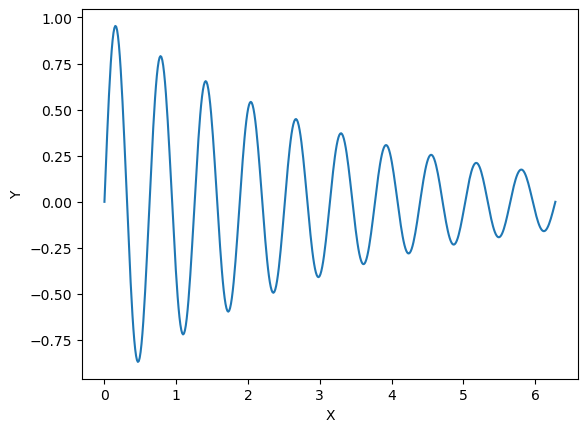

In [19]:
x = np.linspace(0, 2 * np.pi, 500)
y = np.exp(-0.3 * x) * np.sin(10 * x)

plt.plot(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

We can also create all sorts of more complicated plots. Of course I can't show everything here, but here are some common things. See the matplotlib website for more.

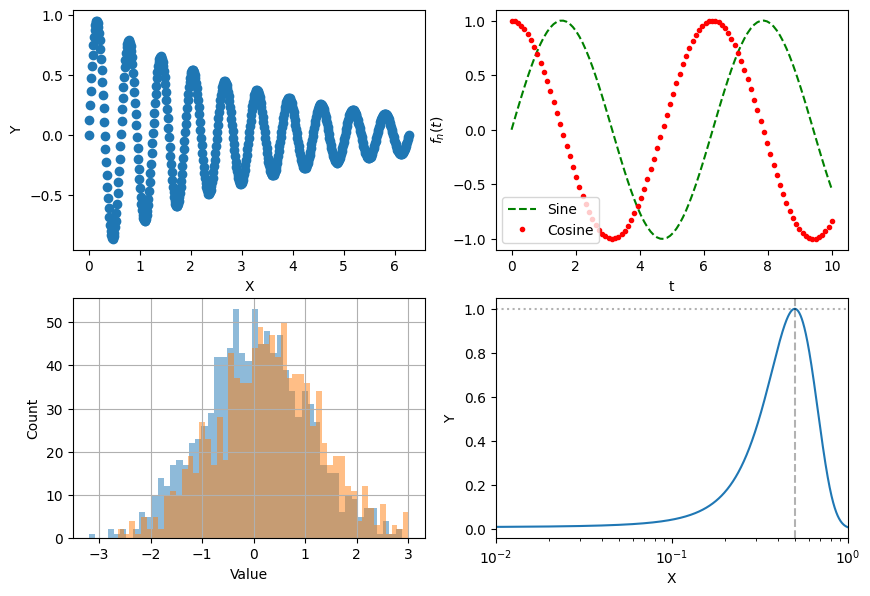

In [92]:

In [92]:
fig, ax = plt.subplots(2, 2, dpi=100, figsize=(10, 7))

x = np.linspace(0, 2 * np.pi, 500)
y = np.exp(-0.3 * x) * np.sin(10 * x)

ax[0,0].scatter(x, y)
ax[0,0].set_xlabel("X")
ax[0,0].set_ylabel("Y")

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

ax[0,1].plot(x, y1, 'g--', label="Sine")
ax[0,1].plot(x, y2, 'r.', label="Cosine")
ax[0,1].legend()
ax[0,1].set_xlabel("t")
ax[0,1].set_ylabel("$f_n(t)$")


data = np.random.randn(1000)
data2 = np.random.randn(1000) + 0.3
ax[1,0].grid()
ax[1,0].hist(data, bins=50, alpha=0.5)
ax[1,0].hist(data2, bins=50, alpha=0.5)
ax[1,0].set_xlabel("Value")
ax[1,0].set_ylabel("Count")

x = np.arange(0, 1, 0.001)
y = np.exp(-(x - 0.5)**2 / 0.05)
ax[1,1].semilogx(x, y)
ax[1,1].axvline(0.5, linestyle='--', color='k', alpha=0.3)
ax[1,1].axhline(1.0, linestyle=':', color='k', alpha=0.3)
ax[1,1].set_xlabel("X")
ax[1,1].set_ylabel("Y")
ax[1,1].set_xlim(0.01, 1)

plt.show()

## Plotting with Colormaps

Sometimes you want to show a 3rd dimension of the data on a 2D plot, for this we can use a colormap. Here a some simple examples.

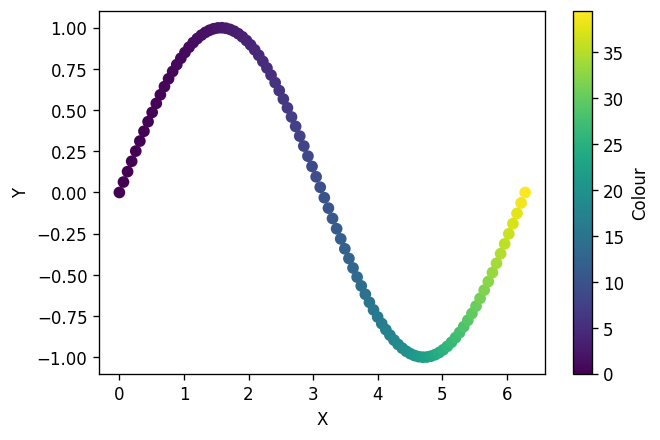

In [66]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)
c = x**2

plt.figure(figsize=(6,4), dpi=120)
plt.scatter(x, y, c=c)
plt.colorbar(label="Colour")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

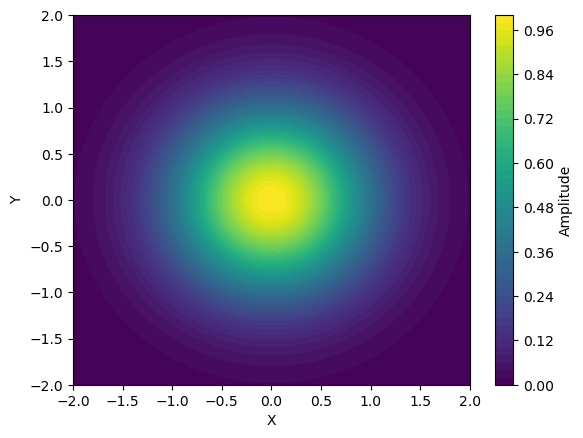

In [21]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

# Generate 2D mesh of coordinates
X, Y = np.meshgrid(x, y)

# 2D Gaussian on a mesh
U = np.exp(-(X**2 + Y**2))

plt.figure(dpi=100)
plt.contourf(X, Y, U, levels=50)
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(label="Amplitude")
plt.show()

## 3D plotting

Matplotlib even includes some options for 3D visualization, although these are fairly limited. PyVista (https://docs.pyvista.org/version/stable/) and Plotly (https://plotly.com/python/) have a few more options.

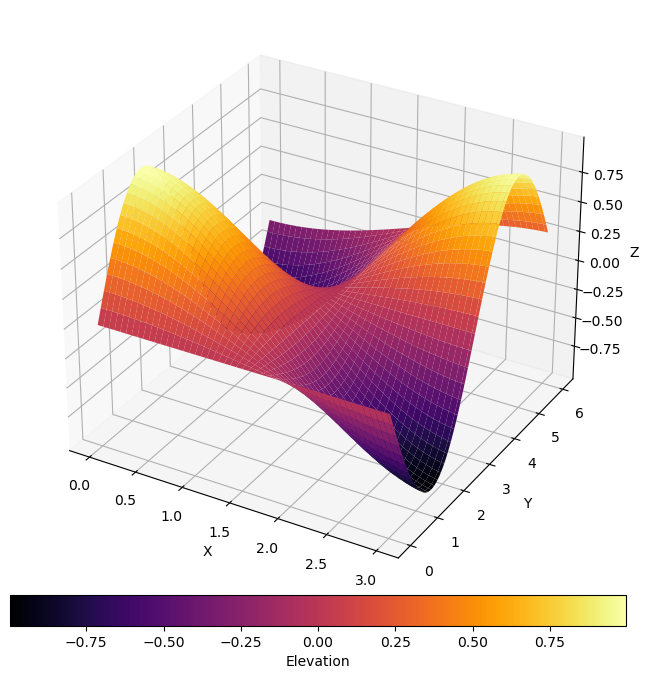

In [42]:
x = np.linspace(0,3,100)
y = np.linspace(0,6,200)
X,Y = np.meshgrid(x,y,indexing='ij')
Z = np.cos(X)*np.sin(Y)

f = plt.figure(figsize=(10,8))
ax = f.add_subplot(111,projection='3d')
im = ax.plot_surface(X,Y,Z,cmap='inferno')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
cb = plt.colorbar(im,ax=ax,label='Elevation',fraction=0.05,orientation='horizontal',pad=0)